In [1]:
import pandas as pd
import numpy as np

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [4]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
# Display unique values in the 'season' column to see the format
match['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [8]:
match = match[match['season'] != '2022']

In [9]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1021 non-null   int64  
 1   season           1021 non-null   object 
 2   city             970 non-null    object 
 3   date             1021 non-null   object 
 4   match_type       1021 non-null   object 
 5   player_of_match  1016 non-null   object 
 6   venue            1021 non-null   object 
 7   team1            1021 non-null   object 
 8   team2            1021 non-null   object 
 9   toss_winner      1021 non-null   object 
 10  toss_decision    1021 non-null   object 
 11  winner           1016 non-null   object 
 12  result           1021 non-null   object 
 13  result_margin    1002 non-null   float64
 14  target_runs      1018 non-null   float64
 15  target_overs     1018 non-null   float64
 16  super_over       1021 non-null   object 
 17  method           21

In [10]:
match[match['city'].isnull()]['venue'].value_counts()

venue
Dubai International Cricket Stadium    33
Sharjah Cricket Stadium                18
Name: count, dtype: int64

In [11]:
# Create a dictionary mapping 'venue' to 'city'
venue_to_city = {
    'Dubai International Cricket Stadium': 'Dubai',
    'Sharjah Cricket Stadium': 'Sharjah',
    # Add more mappings as needed
}

# Fill missing values in 'city' based on the 'venue' using the map function
match['city'] = match['city'].fillna(match['venue'].map(venue_to_city))

In [12]:
match['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [13]:
match['city'] = match['city'].replace('Bangalore','Bengaluru')

In [14]:
match['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [15]:
delivery['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [16]:
delivery['batting_team'] = delivery['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

delivery['batting_team'] = delivery['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

delivery['batting_team'] = delivery['batting_team'].str.replace('Gujarat Lions','Gujarat Titans')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Gujarat Lions','Gujarat Titans')

delivery['batting_team'] = delivery['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')

delivery['batting_team'] = delivery['batting_team'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

In [17]:
print(delivery['batting_team'].unique())
print(delivery['bowling_team'].unique())

['Kolkata Knight Riders' 'Royal Challengers Bengaluru'
 'Chennai Super Kings' 'Punjab Kings' 'Rajasthan Royals' 'Delhi Capitals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Gujarat Titans'
 'Rising Pune Supergiant' 'Lucknow Super Giants']
['Royal Challengers Bengaluru' 'Kolkata Knight Riders' 'Punjab Kings'
 'Chennai Super Kings' 'Delhi Capitals' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Gujarat Titans'
 'Rising Pune Supergiant' 'Lucknow Super Giants']


In [18]:
match['winner'] = match['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
match['winner'] = match['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match['winner'] = match['winner'].str.replace('Gujarat Lions','Gujarat Titans')
match['winner'] = match['winner'].str.replace('Kings XI Punjab','Punjab Kings')
match['winner'] = match['winner'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

In [19]:
match['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bengaluru', 'Rajasthan Royals', 'Punjab Kings',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Gujarat Titans', 'Rising Pune Supergiant', 'Lucknow Super Giants'],
      dtype=object)

In [20]:
match['winner'].value_counts()

winner
Mumbai Indians                 140
Chennai Super Kings            134
Kolkata Knight Riders          125
Royal Challengers Bengaluru    114
Sunrisers Hyderabad            111
Delhi Capitals                 108
Punjab Kings                   105
Rajasthan Royals               102
Gujarat Titans                  29
Lucknow Super Giants            15
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [21]:
delivery['batting_team'].value_counts()

batting_team
Mumbai Indians                 31437
Sunrisers Hyderabad            30877
Royal Challengers Bengaluru    30023
Delhi Capitals                 29732
Kolkata Knight Riders          29514
Punjab Kings                   29479
Chennai Super Kings            28651
Rajasthan Royals               26242
Gujarat Titans                  9060
Pune Warriors                   5443
Lucknow Super Giants            5400
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64

In [22]:
delivery['bowling_team'].value_counts()

bowling_team
Mumbai Indians                 31505
Sunrisers Hyderabad            30756
Royal Challengers Bengaluru    30159
Delhi Capitals                 29941
Kolkata Knight Riders          29663
Punjab Kings                   29202
Chennai Super Kings            28576
Rajasthan Royals               26432
Gujarat Titans                  8846
Pune Warriors                   5457
Lucknow Super Giants            5226
Rising Pune Supergiant          1928
Rising Pune Supergiants         1615
Kochi Tuskers Kerala            1614
Name: count, dtype: int64

In [23]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bengaluru',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

In [24]:
delivery = delivery[delivery['batting_team'].isin(teams)]
delivery = delivery[delivery['bowling_team'].isin(teams)]

In [25]:
delivery['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bengaluru',
       'Chennai Super Kings', 'Punjab Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [26]:
delivery.shape

(240047, 17)

In [27]:
match['method'].unique()

array([nan, 'D/L'], dtype=object)

In [28]:
match = match[match['method'] != 'D/L']

In [29]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1000 non-null   int64  
 1   season           1000 non-null   object 
 2   city             1000 non-null   object 
 3   date             1000 non-null   object 
 4   match_type       1000 non-null   object 
 5   player_of_match  995 non-null    object 
 6   venue            1000 non-null   object 
 7   team1            1000 non-null   object 
 8   team2            1000 non-null   object 
 9   toss_winner      1000 non-null   object 
 10  toss_decision    1000 non-null   object 
 11  winner           995 non-null    object 
 12  result           1000 non-null   object 
 13  result_margin    981 non-null    float64
 14  target_runs      997 non-null    float64
 15  target_overs     997 non-null    float64
 16  super_over       1000 non-null   object 
 17  method           0 

In [30]:
match_df = match[['id','city','winner','target_runs']]

In [31]:
match_df.head(2)

,id,city,winner,target_runs
0,335982,Bengaluru,Kolkata Knight Riders,223.0
1,335983,Chandigarh,Chennai Super Kings,241.0


In [32]:
delivery_df = pd.merge(match_df, delivery, how='inner', left_on='id', right_on='match_id')

In [33]:
delivery_df.sample(5)

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
10723,336032,Delhi,Delhi Capitals,177.0,336032,2,Delhi Capitals,Mumbai Indians,6,6,...,A Nel,S Dhawan,0,0,0,NaN,0,NaN,NaN,NaN
56578,548336,Jaipur,Royal Challengers Bengaluru,190.0,548336,1,Royal Challengers Bengaluru,Rajasthan Royals,9,3,...,GB Hogg,TM Dilshan,0,0,0,NaN,0,NaN,NaN,NaN
83618,729313,Dubai,Punjab Kings,125.0,729313,1,Royal Challengers Bengaluru,Punjab Kings,11,1,...,R Dhawan,JA Morkel,0,0,0,NaN,0,NaN,NaN,NaN
175662,1254080,Delhi,Chennai Super Kings,172.0,1254080,1,Sunrisers Hyderabad,Chennai Super Kings,6,5,...,SN Thakur,MK Pandey,1,0,1,NaN,0,NaN,NaN,NaN
178357,1254096,Abu Dhabi,Kolkata Knight Riders,156.0,1254096,1,Mumbai Indians,Kolkata Knight Riders,19,4,...,LH Ferguson,AF Milne,1,0,1,NaN,0,NaN,NaN,NaN


In [34]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [35]:
delivery_df.describe()

,id,target_runs,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,1.059550e+05,105955.000000,1.059550e+05,105955.0,105955.000000,105955.000000,105955.000000,105955.000000,105955.000000,105955.000000
mean,8.942317e+05,169.365259,8.942317e+05,2.0,8.966052,3.614619,1.257506,0.067699,1.325204,0.049285
std,3.701074e+05,30.885601,3.701074e+05,0.0,5.565912,1.812842,1.635916,0.344948,1.623596,0.216464
min,3.359820e+05,63.000000,3.359820e+05,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483240e+05,149.000000,5.483240e+05,2.0,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809270e+05,169.000000,9.809270e+05,2.0,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.216527e+06,188.000000,1.216527e+06,2.0,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,288.000000,1.426312e+06,2.0,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [36]:
delivery_df.describe(include = 'object')

,city,winner,batting_team,bowling_team,batter,bowler,non_striker,extras_type,player_dismissed,dismissal_kind,fielder
count,105955,105928,105955,105955,105955,105955,105955,5682,5222,5222,3693
unique,33,10,10,10,576,460,567,5,528,10,485
top,Mumbai,Mumbai Indians,Delhi Capitals,Sunrisers Hyderabad,V Kohli,R Ashwin,RG Sharma,wides,RG Sharma,caught,KD Karthik
freq,12939,15428,14293,14362,2393,1987,2331,3396,91,3216,92


In [37]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105955 entries, 124 to 219215
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                105955 non-null  int64  
 1   city              105955 non-null  object 
 2   winner            105928 non-null  object 
 3   target_runs       105955 non-null  float64
 4   match_id          105955 non-null  int64  
 5   inning            105955 non-null  int64  
 6   batting_team      105955 non-null  object 
 7   bowling_team      105955 non-null  object 
 8   over              105955 non-null  int64  
 9   ball              105955 non-null  int64  
 10  batter            105955 non-null  object 
 11  bowler            105955 non-null  object 
 12  non_striker       105955 non-null  object 
 13  batsman_runs      105955 non-null  int64  
 14  extra_runs        105955 non-null  int64  
 15  total_runs        105955 non-null  int64  
 16  extras_type       5682 

In [38]:
# Convert 'total_runs_y' to numeric, force non-numeric to NaN
delivery_df['total_runs'] = pd.to_numeric(delivery_df['total_runs'], errors='coerce')

# Drop rows where 'total_runs_y' is still NaN (which means conversion failed for these rows)
delivery_df = delivery_df.dropna(subset=['total_runs'])

# Now perform the groupby and cumulative sum
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs'].cumsum()

In [39]:
delivery_df['runs_left'] = delivery_df['target_runs'] - delivery_df['current_score']
delivery_df['balls_left'] = 120 - (delivery_df['over']*6 + delivery_df['ball'])

In [40]:
delivery_df.sample(2)

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
32284,419130,Mumbai,Mumbai Indians,173.0,419130,2,Sunrisers Hyderabad,Mumbai Indians,6,2,...,0,6,NaN,0,NaN,NaN,NaN,56,117.0,82
40323,419163,Mumbai,Chennai Super Kings,143.0,419163,2,Sunrisers Hyderabad,Chennai Super Kings,17,5,...,0,0,NaN,0,NaN,NaN,NaN,103,40.0,13


In [41]:
delivery_df['balls_left'].unique()

array([119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107,
       106, 105, 104, 103, 102, 101, 100,  99,  98,  97,  96,  95,  94,
        93,  92,  91,  90,  89,  88,  87,  86,  85,  84,  83,  82,  81,
        80,  79,  78,  77,  76,  75,  74,  73,  72,  71,  70,  69,  68,
        67,  66,  65,  64,  63,  62,  61,  60,  59,  58,  57,  56,  55,
        54,  53,  52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,
        41,  40,  39,  38,  37,  36,  35,  34,  33,  32,  31,  30,  29,
        28,  27,  26,  25,  24,  23,  22,  21,  20,  19,  18,  17,  16,
        15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,
         2,   1,   0,  -1,  -2,  -3], dtype=int64)

In [42]:
print((delivery_df['balls_left'] < 0).sum())
print((delivery_df['balls_left'] == -1).sum())
print((delivery_df['balls_left'] == -2).sum())
print((delivery_df['balls_left'] == -3).sum())

111
89
20
2


In [43]:
delivery_df.loc[delivery_df['balls_left'] < 0, 'balls_left'] = 0
print((delivery_df['balls_left'] < 0).sum())

0


In [44]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [45]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105955 entries, 124 to 219215
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                105955 non-null  int64  
 1   city              105955 non-null  object 
 2   winner            105928 non-null  object 
 3   target_runs       105955 non-null  float64
 4   match_id          105955 non-null  int64  
 5   inning            105955 non-null  int64  
 6   batting_team      105955 non-null  object 
 7   bowling_team      105955 non-null  object 
 8   over              105955 non-null  int64  
 9   ball              105955 non-null  int64  
 10  batter            105955 non-null  object 
 11  bowler            105955 non-null  object 
 12  non_striker       105955 non-null  object 
 13  batsman_runs      105955 non-null  int64  
 14  extra_runs        105955 non-null  int64  
 15  total_runs        105955 non-null  int64  
 16  extras_type       5682 

In [46]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum()
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bengaluru,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,...,1,NaN,0,0,NaN,NaN,1,222.0,119,10
125,335982,Bengaluru,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,2,...,1,wides,0,0,NaN,NaN,2,221.0,118,10
126,335982,Bengaluru,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,3,...,0,NaN,0,0,NaN,NaN,2,221.0,117,10
127,335982,Bengaluru,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,4,...,1,NaN,0,0,NaN,NaN,3,220.0,116,10
128,335982,Bengaluru,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,5,...,1,NaN,0,0,NaN,NaN,4,219.0,115,10


In [47]:
# Finding current runrate
# Runrate = run/over
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [48]:
# Required runrate
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [49]:
delivery_df[delivery_df['winner'].isnull()]

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
105839,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,0,1,...,0,0,NaN,NaN,0,188.0,119,10,0.000000,9.478992
105840,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,0,2,...,0,0,NaN,NaN,1,187.0,118,10,3.000000,9.508475
105841,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,0,3,...,0,0,NaN,NaN,1,187.0,117,10,2.000000,9.589744
105842,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,0,4,...,0,0,NaN,NaN,1,187.0,116,10,1.500000,9.672414
105843,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,0,5,...,0,0,NaN,NaN,1,187.0,115,10,1.200000,9.756522
105844,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,0,6,...,0,0,NaN,NaN,2,186.0,114,10,2.000000,9.789474
105845,829813,Bengaluru,NaN,188.0,829813,2,Royal Challengers Bengaluru,Delhi Capitals,1,1,...,0,0,NaN,NaN,2,186.0,113,10,1.714286,9.876106
153069,1178424,Bengaluru,NaN,63.0,1178424,2,Rajasthan Royals,Royal Challengers Bengaluru,0,1,...,0,0,NaN,NaN,0,63.0,119,10,0.000000,3.176471
153070,1178424,Bengaluru,NaN,63.0,1178424,2,Rajasthan Royals,Royal Challengers Bengaluru,0,2,...,0,0,NaN,NaN,6,57.0,118,10,18.000000,2.898305
153071,1178424,Bengaluru,NaN,63.0,1178424,2,Rajasthan Royals,Royal Challengers Bengaluru,0,3,...,0,0,NaN,NaN,10,53.0,117,10,20.000000,2.717949


In [50]:
match_df[match_df['id']==829813]

,id,city,winner,target_runs
511,829813,Bengaluru,NaN,188.0


In [51]:
match_df[match_df['id']==1178424]

,id,city,winner,target_runs
744,1178424,Bengaluru,NaN,63.0


In [52]:
delivery_df.dropna(subset=['winner'], inplace=True)

In [53]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105928 entries, 124 to 219215
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                105928 non-null  int64  
 1   city              105928 non-null  object 
 2   winner            105928 non-null  object 
 3   target_runs       105928 non-null  float64
 4   match_id          105928 non-null  int64  
 5   inning            105928 non-null  int64  
 6   batting_team      105928 non-null  object 
 7   bowling_team      105928 non-null  object 
 8   over              105928 non-null  int64  
 9   ball              105928 non-null  int64  
 10  batter            105928 non-null  object 
 11  bowler            105928 non-null  object 
 12  non_striker       105928 non-null  object 
 13  batsman_runs      105928 non-null  int64  
 14  extra_runs        105928 non-null  int64  
 15  total_runs        105928 non-null  int64  
 16  extras_type       5680 

### If batting team of second inning won then result is 1 else it is 0

In [55]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [56]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [57]:
delivery_df.sample(5)

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
131408,1136577,Pune,Chennai Super Kings,205.0,1136577,2,Rajasthan Royals,Chennai Super Kings,3,4,...,0,NaN,NaN,30,175.0,98,8,8.181818,10.714286,0
51311,501271,Chennai,Chennai Super Kings,206.0,501271,2,Royal Challengers Bengaluru,Chennai Super Kings,14,5,...,0,NaN,NaN,101,105.0,31,3,6.808989,20.322581,0
166663,1216544,Dubai,Chennai Super Kings,146.0,1216544,2,Chennai Super Kings,Royal Challengers Bengaluru,11,6,...,0,NaN,NaN,105,41.0,48,9,8.750000,5.125000,1
9794,336027,Kolkata,Rajasthan Royals,148.0,336027,2,Rajasthan Royals,Kolkata Knight Riders,13,2,...,0,NaN,NaN,109,39.0,40,6,8.175000,5.850000,1
118657,1082596,Hyderabad,Sunrisers Hyderabad,136.0,1082596,2,Sunrisers Hyderabad,Gujarat Titans,10,6,...,0,NaN,NaN,101,35.0,54,9,9.181818,3.888889,1


In [58]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','target_runs','crr','rrr','result']]

In [59]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105928 entries, 124 to 219215
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   batting_team  105928 non-null  object 
 1   bowling_team  105928 non-null  object 
 2   city          105928 non-null  object 
 3   runs_left     105928 non-null  float64
 4   balls_left    105928 non-null  int64  
 5   wickets       105928 non-null  int32  
 6   target_runs   105928 non-null  float64
 7   crr           105928 non-null  float64
 8   rrr           105910 non-null  float64
 9   result        105928 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 8.5+ MB


In [60]:
final_df[final_df['rrr'].isnull()]

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,crr,rrr,result
6618,Chennai Super Kings,Delhi Capitals,Delhi,0.0,0,4,188.0,9.40,NaN,1
11790,Rajasthan Royals,Mumbai Indians,Jaipur,0.0,0,5,146.0,7.30,NaN,1
13190,Rajasthan Royals,Chennai Super Kings,Mumbai,0.0,0,3,164.0,8.20,NaN,1
18763,Punjab Kings,Kolkata Knight Riders,Port Elizabeth,0.0,0,6,154.0,7.70,NaN,1
24345,Kolkata Knight Riders,Chennai Super Kings,Centurion,0.0,0,7,189.0,9.45,NaN,1
56033,Chennai Super Kings,Rajasthan Royals,Chennai,0.0,0,7,147.0,7.35,NaN,1
59696,Mumbai Indians,Chennai Super Kings,Mumbai,0.0,0,2,174.0,8.70,NaN,1
68162,Chennai Super Kings,Royal Challengers Bengaluru,Chennai,0.0,0,4,166.0,8.30,NaN,1
129559,Delhi Capitals,Mumbai Indians,Mumbai,0.0,0,7,195.0,9.75,NaN,1
147217,Mumbai Indians,Punjab Kings,Mumbai,0.0,0,3,198.0,9.90,NaN,1


In [61]:
final_df = final_df.fillna(0)

In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105928 entries, 124 to 219215
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   batting_team  105928 non-null  object 
 1   bowling_team  105928 non-null  object 
 2   city          105928 non-null  object 
 3   runs_left     105928 non-null  float64
 4   balls_left    105928 non-null  int64  
 5   wickets       105928 non-null  int32  
 6   target_runs   105928 non-null  float64
 7   crr           105928 non-null  float64
 8   rrr           105928 non-null  float64
 9   result        105928 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 8.5+ MB


In [63]:
final_df.shape[0]

105928

In [64]:
final_df = final_df.sample(final_df.shape[0])

In [65]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,crr,rrr,result
8701,Sunrisers Hyderabad,Delhi Capitals,Delhi,35.0,14,5,195.0,9.056604,15.0,0


In [66]:
final_df[final_df['balls_left'] == 0]

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,crr,rrr,result
212116,Sunrisers Hyderabad,Royal Challengers Bengaluru,Hyderabad,36.0,0,2,207.0,8.55,inf,0
89154,Delhi Capitals,Rajasthan Royals,Ahmedabad,63.0,0,1,202.0,6.95,inf,0
168815,Rajasthan Royals,Kolkata Knight Riders,Dubai,61.0,0,1,192.0,6.55,inf,0
105227,Kolkata Knight Riders,Mumbai Indians,Mumbai,6.0,0,3,172.0,8.30,inf,0
199392,Sunrisers Hyderabad,Gujarat Titans,Ahmedabad,35.0,0,1,189.0,7.70,inf,0
...,...,...,...,...,...,...,...,...,...,...
204361,Delhi Capitals,Rajasthan Royals,Jaipur,13.0,0,5,186.0,8.65,inf,0
179183,Sunrisers Hyderabad,Punjab Kings,Sharjah,7.0,0,3,126.0,5.95,inf,0
207752,Punjab Kings,Sunrisers Hyderabad,Mohali,3.0,0,4,183.0,9.00,inf,0
164588,Punjab Kings,Mumbai Indians,Dubai,1.0,0,4,177.0,8.80,inf,1


In [67]:
final_df = final_df[final_df['balls_left'] != 0]

In [68]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105454 entries, 106199 to 127093
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   batting_team  105454 non-null  object 
 1   bowling_team  105454 non-null  object 
 2   city          105454 non-null  object 
 3   runs_left     105454 non-null  float64
 4   balls_left    105454 non-null  int64  
 5   wickets       105454 non-null  int32  
 6   target_runs   105454 non-null  float64
 7   crr           105454 non-null  float64
 8   rrr           105454 non-null  float64
 9   result        105454 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 8.4+ MB


In [69]:
# Check if there are any positive or negative infinity values in the DataFrame
infinity_check = final_df.isin([np.inf, -np.inf])

# Summarize the number of infinity values in each column
print("Number of infinity values in each column:\n", infinity_check.sum())

Number of infinity values in each column:
 batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
target_runs     0
crr             0
rrr             0
result          0
dtype: int64


In [70]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [71]:
X_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,crr,rrr
110516,Gujarat Titans,Royal Challengers Bengaluru,Rajkot,65.0,45,8,181.0,9.280000,8.666667
132670,Mumbai Indians,Sunrisers Hyderabad,Mumbai,58.0,49,6,119.0,5.154930,7.102041
26777,Rajasthan Royals,Mumbai Indians,Mumbai,17.0,10,5,213.0,10.690909,10.200000
27994,Royal Challengers Bengaluru,Punjab Kings,Bengaluru,45.0,24,8,204.0,9.937500,11.250000
140856,Rajasthan Royals,Kolkata Knight Riders,Kolkata,75.0,49,9,170.0,8.028169,9.183673


In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [73]:
trf1 = ColumnTransformer(
    transformers=[
        ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)

## Using XGBClassifier 

In [75]:
# Assuming trf1 and trf3 are already defined transformation steps

# pipe_xg = Pipeline(steps=[
#     ('step1', trf1),  # Your first transformation step
#     ('step2', StandardScaler()),  # Standard Scaler for feature scaling
#     ('step3', XGBClassifier(n_estimators=1000, learning_rate=0.25, max_depth=12, random_state=1))  # XGBoost Classifier
# ])

In [76]:
# pipe_xg.fit(X_train,y_train)

In [77]:
# y_pred = pipe_xg.predict(X_test)

In [78]:
# accuracy_score(y_test,y_pred)

In [79]:
# pipe_xg.predict_proba(X_test)[7]

## Using RandomForest Classifier

In [81]:
pipe_rf = Pipeline(steps=[
                ('step1',trf1),
                ('step2', StandardScaler()),
                ('step3',RandomForestClassifier(n_estimators=500, max_depth=15, random_state=1))])

In [82]:
pipe_rf.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 RandomForestClassifier(max_depth=15, n_estimators=500,
                                        random_state=1))])

In [83]:
y_pred = pipe_rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9514958987245745

In [85]:
pipe_rf.predict_proba(X_test)[96]

array([0.46591025, 0.53408975])

In [86]:
import pickle
pickle.dump(pipe_rf,open('winner_predictor_2022.pkl','wb'))

## Using Logistic Regression

In [88]:
# pipe_lr = Pipeline(steps=[
#     ('step1', trf1),  # Your first transformation step
#     ('step2', StandardScaler()),  # Standard Scaler for feature scaling
#     ('step3', LogisticRegression(max_iter=1000, random_state=1))  # Logistic Regression
# ])

In [89]:
# pipe_lr.fit(X_train,y_train)

In [90]:
# y_pred = pipe_lr.predict(X_test)
# accuracy_score(y_test,y_pred)

## Using Gridsearch Cv in RandomForest Classifier

In [92]:
# pipe_rf = Pipeline(steps=[
#     ('step1', trf1),  # Your first transformation step
#     ('step2', StandardScaler()),  # Standard Scaler for feature scaling
#     ('step3', RandomForestClassifier(n_estimators=100, max_depth=12, random_state=1))  # RandomForest Classifier
# ])

In [93]:
# param_grid = {
#     'step3__n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'step3__max_depth': [10, 12, 15],        # Maximum depth of the tree
#     'step3__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'step3__min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
# }

In [94]:
# grid_search = GridSearchCV(pipe_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [95]:
# grid_search.fit(X_train, y_train)

In [96]:
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Score:", grid_search.best_score_)

In [97]:
# y_pred = grid_search.predict(X_test)
# accuracy_score(y_test,y_pred)

In [98]:
# # Access the best model from GridSearchCV
# best_model = grid_search.best_estimator_

# # Display the best model
# print(best_model)

In [99]:
# import pickle

# # Save the best model to a file
# with open('best_model.pkl', 'wb') as file:
#     pickle.dump(best_model, file)

In [100]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [101]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','target_runs','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose_prob'] = np.round(result.T[0]*100,1)
    temp_df['win_prob'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['target_runs'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','runs_left','wickets_in_over','lose_prob','win_prob']]
    return temp_df,target

In [104]:
temp_df,target = match_progression(delivery_df, 335985 ,pipe_rf)
temp_df

Target- 166.0


,end_of_over,runs_after_over,runs_left,wickets_in_over,lose_prob,win_prob
820,1,10.0,156.0,0,25.5,74.5
826,2,1.0,155.0,0,31.9,68.1
832,3,11.0,144.0,0,26.1,73.9
838,4,5.0,139.0,0,26.6,73.4
844,5,10.0,129.0,0,26.1,73.9
851,6,3.0,126.0,1,26.0,74.0
857,7,6.0,120.0,0,36.8,63.2
863,8,8.0,112.0,0,36.0,64.0
869,9,14.0,98.0,1,34.3,65.7
876,10,8.0,90.0,1,34.3,65.7


Text(0.5, 1.0, 'Target-166.0')

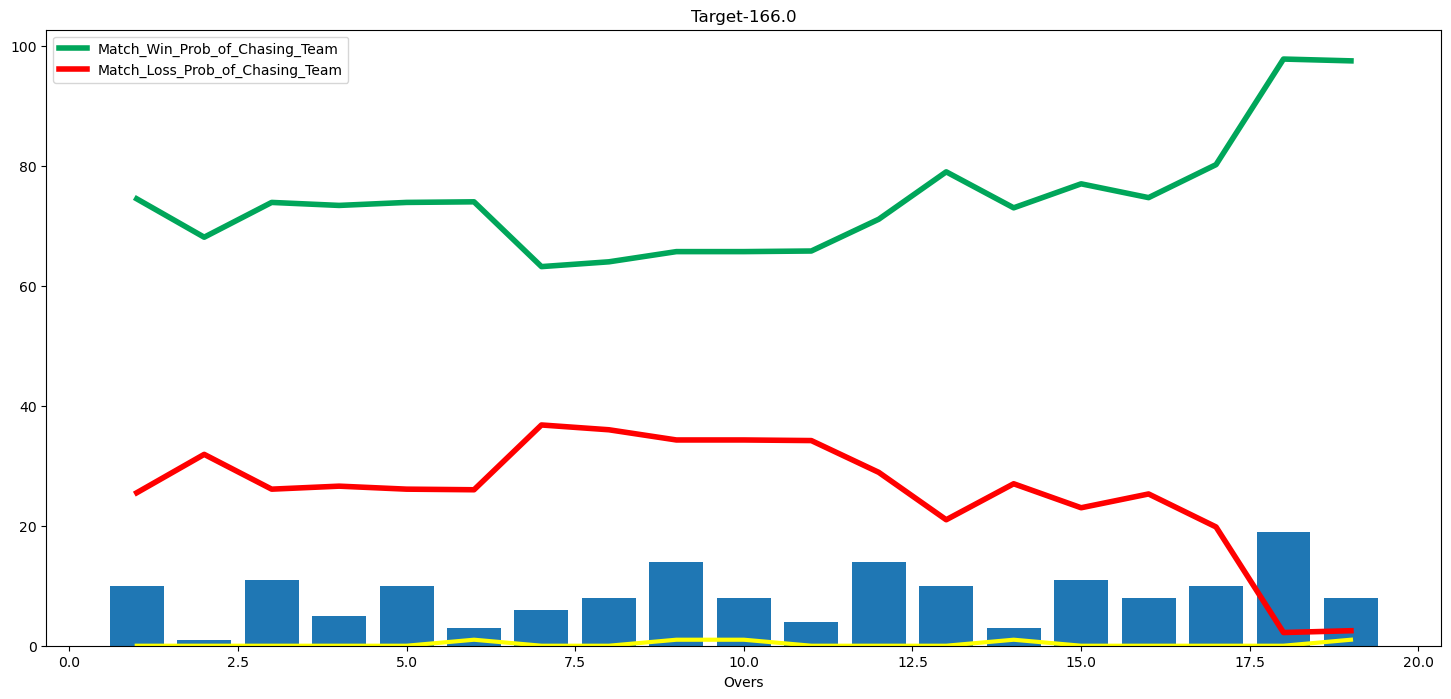

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win_prob'],color='#00a65a',label = 'Match_Win_Prob_of_Chasing_Team',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose_prob'],color='red',label = 'Match_Loss_Prob_of_Chasing_Team',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.xlabel('Overs')
plt.legend()
plt.title('Target-' + str(target))

In [108]:
final_df['batting_team'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bengaluru',
       'Gujarat Titans', 'Delhi Capitals', 'Sunrisers Hyderabad',
       'Kolkata Knight Riders', 'Punjab Kings', 'Mumbai Indians',
       'Chennai Super Kings', 'Lucknow Super Giants'], dtype=object)